1. Players with the most home runs:
  Batters Name  Total Home Runs
0  Jose Miguel               44
1       Curtis               43
2  Joshua Holt               43

2. Players with the most stolen bases:
     Batters Name  Total Stolen Bases
0  Michael Nelson                  49
1     Rajai Lavae                  46
2          Everth                  44

3. Players with the most RBI's:
  Batters Name  Total RBI
0       Carlos        153
1  Jose Miguel        139
2  Joshua Holt        128

4. Teams with the highest overall batting averages:
  Team  Batting Average
0  CLE         0.258721
1  SLN         0.221754
2  TEX         0.220066
3  PHI         0.215595
4  SEA         0.215345


<Axes: title={'center': 'Top 5 Teams with Highest Batting Averages'}, xlabel='Team', ylabel='Batting Average'>

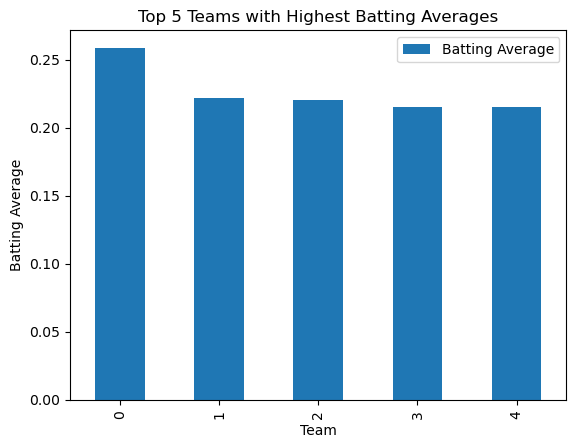

In [30]:
import pandas as pd

# Read the batting.csv file
batting_df = pd.read_csv('batting.csv')

# Read the master.csv file
master_df = pd.read_csv('master.csv')

# Merge the batting and master dataframes on 'playerID'
merged_df = pd.merge(batting_df, master_df[['playerID', 'nameGiven']], on='playerID', how='left')

# 1. What 3 players lead the season in home runs?
home_runs_leaders = merged_df.groupby('nameGiven')['HR'].sum().nlargest(3).reset_index()
home_runs_leaders.columns = ['Batters Name', 'Total Home Runs']
print("1. Players with the most home runs:")
print(home_runs_leaders)

# 2. What 3 players had the most stolen bases?
stolen_bases_leaders = merged_df.groupby('nameGiven')['SB'].sum().nlargest(3).reset_index()
stolen_bases_leaders.columns = ['Batters Name', 'Total Stolen Bases']
print("\n2. Players with the most stolen bases:")
print(stolen_bases_leaders)

# 3. What 3 players had the most RBI's?
rbi_leaders = merged_df.groupby('nameGiven')['RBI'].sum().nlargest(3).reset_index()
rbi_leaders.columns = ['Batters Name', 'Total RBI']
print("\n3. Players with the most RBI's:")
print(rbi_leaders)

# 4. What 5 teams had the highest overall batting averages?
# Calculate batting average (AVG) for each player
merged_df['AVG'] = merged_df['H'] / merged_df['AB']

# Calculate overall batting average for each team
team_batting_average = merged_df.groupby('teamID')['AVG'].mean().nlargest(5).reset_index()
team_batting_average.columns = ['Team', 'Batting Average']
print("\n4. Teams with the highest overall batting averages:")
print(team_batting_average)


# Plotting the graph for question 4
team_batting_average.plot(kind='bar', xlabel='Team', ylabel='Batting Average', title='Top 5 Teams with Highest Batting Averages')
